#  <font color='#57998f'>Taxi Trajectory Data | Machine Learning Application </font>

Current notebook is part of the final assignment in the context of **'Machine Learning'** course, <br> provided by MSc in Artificial Intelligence from NCSR Demokritos. 

Dataset Reference:  
Taxi Service Trajectory - Prediction Challenge, [ECML PKDD](https://ecmlpkdd.org/) 2015 Data Set <br>

  
<br>

> Chiotis Nikolaos - MTN2221 <br>
> chiotisn@yahoo.com <br>





##  <font color='#37665f'>Preprocessed Dataset Description</font> 

The preprocessed data collected, have the below features:

|  | Feature Name | DataType | Description |
| :-: | :-: | :-: | :- |
| 1 | **TRIP_ID** | String | Contains an unique **id** for each trip |
| 2 | **CALL_TYPE** | String | Identifies the way used to **demand this service**. <br><br> It may contain one of three possible values: <br> **A**: if this trip was dispatched from the central <br> **B**: if this trip was demanded directly to a taxi driver on a specific stand <br> **C**: otherwise (i.e. a trip demanded on a random street) |
| 3 | **ORIGIN_CALL** | Integer | Contains a **customer id** for each phone number which was used to demand, at least, one service. <br> It identifies the trip’s customer if CALL_TYPE=’A’, otherwise, it assumes a NULL value |
| 4 | **ORIGIN_STAND** | Integer |  Contains a **taxi stand id**. <br> It identifies the starting point of the trip if CALL_TYPE=’B’, otherwise, it assumes a NULL value |
| 5 | **TAXI_ID** | Integer | Contains the **taxi driver's id** that performed each trip |
| 6 | **DAYTYPE** | String | Identifies the **daytype of the trip’s start**. <br> It assumes one of three possible values: <br> **B**: if this trip started on a holiday or any other special day (i.e. extending holidays, floating holidays, etc.) <br> **C**: if the trip started on a day before a type-B day <br> **A**: otherwise (i.e. a normal day, workday or weekend)|
| 7 | **TRAVEL_DURATION** | Integer | Taxi **trip duration** in seconds |
| 8 | **FROM_DATE** | Datetime | Trip **starting datetime** |
| 9 | **HOUR** | Datetime |  Trip **starting hour of day**|
| 10 | **DAY_OF_WEEK** | Datetime |  Trip **starting day of week**|
| 11 | **MONTH** | Datetime |  Trip **starting month** |
| 12 | **TO_DATE** | Datetime |  Trip **ending datetime**|
| 13 | **FROM_ROADTYPE** | String | **Road type** of departure point |
| 14 | **FROM_LANES** | Integer/List | **Number of lanes** at departure point |
| 15 | **TO_ROADTYPE** | String | **Road type** of arrival point |
| 16 | **TO_LANES** | Integer/List | **Number of lanes** at arrival point |
| 17 | **MAP_ROUTE_LENGTH** | Float | **Trip length** based on map's shortest route (in meters) |
| 18 | **HIGHWAY** | Float | **Perventage** of map's shortest route that is on **highway**  |
| 19 | **RESIDENTIAL** | Float | **Perventage** of map's shortest route that is on **residential street** |
| 20 | **LIVING_STREET** | Float | **Perventage** of map's shortest route that is on **living street** |
| 21 | **ROUTE_TURNS** | Integer | **Number of turns** of map's shortest route |


<br> <br>

##  <font color='#37665f'>Requirements</font> 

This project developed and executed using **Python 3.9.6.**  in **Jupyter Notebook**.<br><br>
Preprocessed dataset size: **9.5MB** <br><br>
**Libraries** used, can be found at [requirements.txt](https://github.com/chiotisn/MScAI-ML-Assignment-ChiotisN/blob/main/requirements.txt).

In [79]:
import os
import math
import joblib

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import *

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)

<br> <br>

##  <font color='#37665f'>Read Dataset</font> 

<font color='#425451'>Checks if dataset is available, if yes, reads it.</font> 

In [2]:
print('Looking for preprocessed dataset..')
if os.path.exists('./preprocessed_data.pkl'):
    print('Reading preprocessed dataset from:\tpreprocessed_data.pkl')
    df = pd.read_pickle('./preprocessed_data.pkl')
    print('We are ready to go!')
else: 
    print('Preprocessed datased not found. Please execute:\t1. Data Preprocessing.ipynb')

Looking for preprocessed dataset..
Reading preprocessed dataset from:	preprocessed_data.pkl
We are ready to go!


<font color='#425451'>Dataset shape</font> 

In [3]:
print('Dataset has {} columns and {} rows.'.format(df.shape[1],df.shape[0]))

Dataset has 21 columns and 68994 rows.


<br> <br>

##  <font color='#37665f'>Data Transformation for ML</font> 

####  <font color='#425451'>Check columns with null values</font> 

FROM_LANES, TO_LANES: Information missing in small uncategorized road, so we fill null with 0 <br>
HIGHWAY, RESIDENTIAL, LIVING_STREET, ROUTE_TURNS: No information found means that these values are 0

In [4]:
df.isna().sum()

TRIP_ID                 0
CALL_TYPE               0
ORIGIN_CALL             0
ORIGIN_STAND            0
TAXI_ID                 0
DAY_TYPE                0
TRAVEL_DURATION         0
FROM_DATE               0
TO_DATE                 0
HOUR                    0
DAY_OF_WEEK             0
MONTH                   0
FROM_ROADTYPE           0
FROM_LANES          32534
TO_ROADTYPE             0
TO_LANES            35672
MAP_ROUTE_LENGTH        0
HIGHWAY               337
RESIDENTIAL           337
LIVING_STREET         337
ROUTE_TURNS             2
dtype: int64

In [5]:
df.fillna(0, inplace=True)

####  <font color='#425451'>Impute String/List variables</font> 

In order to make dataset data types compatible with ML algorithms, we tranform string and list variables

<font color='#425451'>OneHot Encoding for CALL_TYPE</font> 

In [6]:
df['CALL_TYPE'].value_counts(normalize=True)

B    0.514784
C    0.270110
A    0.215106
Name: CALL_TYPE, dtype: float64

In [7]:
df = pd.get_dummies(df, columns=['CALL_TYPE']).rename(columns={'CALL_TYPE_A':'CALL_TYPE_RANDOM',
                                                               'CALL_TYPE_B':'CALL_TYPE_CENTER',
                                                               'CALL_TYPE_C':'CALL_TYPE_STAND'})

<font color='#425451'>Drop DAY_TYPE, because only contains one value</font> 

In [8]:
df['DAY_TYPE'].value_counts(normalize=True)

A    1.0
Name: DAY_TYPE, dtype: float64

In [9]:
df.drop(columns=['DAY_TYPE'], inplace=True)

<font color='#425451'>LabelEncode FROM_ROADTYPE & TO_ROADTYPE, based on the street flow.</font>  <br><br>
0 for living street - 8 for motorway

In [10]:
df['FROM_ROADTYPE'] = df.loc[:,'FROM_ROADTYPE'].apply(lambda x: 1 if x in ['living_street','[residential, living_street]'] else 
                                                                2 if x in ['residential','[residential, tertiary]'] else 
                                                                4 if x in ['tertiary','tertiary_link','[tertiary, tertiary_link]'] else 
                                                                5 if x in ['secondary','secondary_link','[secondary, secondary_link]'] else 
                                                                6 if x in ['primary','primary_link'] else 
                                                                7 if x in ['trunk','trunk_link'] else 
                                                                8 if x in ['motorway','motorway_link'] else 3)  

In [11]:
df['TO_ROADTYPE'] = df.loc[:,'TO_ROADTYPE'].apply(lambda x: 1 if x in ['living_street','[residential, living_street]'] else 
                                                                2 if x in ['residential','[residential, tertiary]'] else 
                                                                4 if x in ['tertiary','tertiary_link','[tertiary, tertiary_link]'] else 
                                                                5 if x in ['secondary','secondary_link','[secondary, secondary_link]'] else 
                                                                6 if x in ['primary','primary_link'] else 
                                                                7 if x in ['trunk','trunk_link'] else 
                                                                8 if x in ['motorway','motorway_link'] else 3)  

<font color='#425451'>Clean FROM_LANES & TO_LANES, bacause some records have lists instead of integer values.</font>  

In [12]:
df['FROM_LANES'].value_counts()

0            32534
2            18023
3            12064
1             2704
[2, 3]        1456
[3, 4]         763
4              710
[2, 1, 3]      418
5              143
[2, 1]         101
[3, 1]          56
[5, 4]          17
[2, 4]           5
Name: FROM_LANES, dtype: int64

In [13]:
df['FROM_LANES'] = df['FROM_LANES'].astype(str) \
                                   .str.replace('[','',regex=False) \
                                   .str.replace(']','',regex=False) \
                                   .str.replace('\'','',regex=False) \
                                   .str.replace(' ','',regex=False) \
                                   .str.split(',') \
                                   .apply(lambda x: int(max(x)))

df['TO_LANES'] = df['TO_LANES'].astype(str) \
                               .str.replace('[','',regex=False) \
                               .str.replace(']','',regex=False) \
                               .str.replace('\'','',regex=False) \
                               .str.replace(' ','',regex=False) \
                               .str.split(',') \
                               .apply(lambda x: int(max(x)))

In [14]:
df['FROM_LANES'].value_counts()

0    32534
2    18124
3    13994
1     2704
4     1478
5      160
Name: FROM_LANES, dtype: int64

####  <font color='#425451'>Drop columns that are not needed</font> 

In [15]:
df.drop(columns=['TRIP_ID', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID', 'FROM_DATE', 'TO_DATE'], inplace=True)

####  <font color='#425451'>Check correlations between variables</font> 

In [16]:
cor_matrix = df.corr(method='pearson').abs()
cor_matrix = pd.melt(cor_matrix.reset_index(), id_vars='index', value_vars=cor_matrix.columns)

In [17]:
cor_matrix[(cor_matrix['index']!=cor_matrix['variable']) & (cor_matrix['value']>0.95)]

,index,variable,value


No correlated features found

<br> <br>

##  <font color='#37665f'>Travel Duration Prediction | Regression Task</font> 

####  <font color='#425451'>Train - Test Data Split</font> 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TRAVEL_DURATION', axis=1), 
                                                    df['TRAVEL_DURATION'], 
                                                    test_size = 0.2, 
                                                    random_state=32)

In [19]:
X_train.shape

(55195, 15)

In [20]:
X_test.shape

(13799, 15)

####  <font color='#425451'>Scale Data</font> 

In [21]:
x_scaler = StandardScaler()

X_train_s = x_scaler.fit_transform(X_train)
X_test_s = x_scaler.transform(X_test)  

# save scaler to use when scoring new data
joblib.dump(x_scaler, './models/x_scaler_travel_duration.pkl')

y_scaler = StandardScaler()

y_train_s = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1)).reshape(1, -1)[0]
y_test_s = y_scaler.transform(np.array(y_test).reshape(-1, 1)).reshape(1, -1)[0]

# save scaler to use when scoring new data
joblib.dump(y_scaler, './models/y_scaler_travel_duration.pkl')

['./models/y_scaler_travel_duration.pkl']

####  <font color='#425451'>KNeighbors Regressor</font> 

In [39]:
knr = KNeighborsRegressor(algorithm='kd_tree',
                          n_jobs=-1)

parameters = {'n_neighbors':[10, 15]}

scorers = {'mean_squared_error':'neg_mean_squared_error',
           'root_mean_squared_error':'neg_root_mean_squared_error',
           'mean_absolute_percentage_error':'neg_mean_absolute_percentage_error',}

grid_search_knr = GridSearchCV(estimator = knr,
                               param_grid = parameters,
                               scoring = scorers,
                               n_jobs = -1,
                               cv = 5,
                               refit=False)

grid_search_knr.fit(X_train_s, y_train_s)

grid_search_knr_results = pd.DataFrame(grid_search_knr.cv_results_)

grid_search_knr_results[['params','mean_fit_time','mean_test_mean_squared_error',
                         'mean_test_root_mean_squared_error']]

,params,mean_fit_time,mean_test_mean_squared_error,mean_test_root_mean_squared_error,mean_test_mean_absolute_percentage_error
0,{'n_neighbors': 10},0.570500,-0.857077,-0.925270,-1.815961
1,{'n_neighbors': 15},0.651965,-0.843236,-0.917781,-1.742147


In [56]:
# inverse scaling
y_scaler.inverse_transform(np.array(grid_search_knr_results['mean_test_root_mean_squared_error']).reshape(-1, 1))/60

array([[3.26033652],
       [3.31785722]])

<font color='#425451'>Fit best KNeighbors Regressor</font>  

In [57]:
knr = KNeighborsRegressor(n_neighbors=15,
                          algorithm='kd_tree',
                          n_jobs=-1)

knr.fit(X_train_s, y_train_s)
y_pred = knr.predict(X_test_s)

<font color='#425451'>Performance on Test</font>  

In [64]:
test_tmp = y_scaler.inverse_transform(y_test_s.reshape(-1, 1))[:,0]
pred_tmp = y_scaler.inverse_transform(y_pred.reshape(-1, 1))[:,0]
print('Mean rooted square error in minutes: ')
math.sqrt(mean_squared_error(test_tmp,pred_tmp))/60

Mean rooted square error in minutes: 


6.512065199284308

####  <font color='#425451'>Random Forest Regressor</font> 

In [28]:
rfr = RandomForestRegressor(criterion='squared_error',
                            min_samples_leaf=5,
                            min_samples_split=10)

parameters = {'n_estimators':[200, 500],
              'max_depth':[3,5]}

scorers = {'mean_squared_error':'neg_mean_squared_error',
           'root_mean_squared_error':'neg_root_mean_squared_error',
           'mean_absolute_percentage_error':'neg_mean_absolute_percentage_error',}

grid_search_rfr = GridSearchCV(estimator = rfr,
                               param_grid = parameters,
                               scoring = scorers,
                               n_jobs = -1,
                               cv = 5,
                               refit=False)

grid_search_rfr.fit(X_train, y_train)

grid_search_rfr_results = pd.DataFrame(grid_search_rfr.cv_results_)

grid_search_rfr_results[['params','mean_fit_time','mean_test_mean_squared_error',
                         'mean_test_root_mean_squared_error']]

,params,mean_fit_time,mean_test_mean_squared_error,mean_test_root_mean_squared_error
0,"{'max_depth': 3, 'n_estimators': 200}",35.199301,-180036.006192,-424.109346
1,"{'max_depth': 3, 'n_estimators': 500}",89.702980,-179786.291054,-423.820396
2,"{'max_depth': 5, 'n_estimators': 200}",59.209045,-173844.979902,-416.742975
3,"{'max_depth': 5, 'n_estimators': 500}",141.421996,-173999.132099,-416.927455


<font color='#425451'>Fit best Random Forest Regressor</font>  

In [29]:
rfr = RandomForestRegressor(n_estimators=200,
                            criterion='squared_error',
                            max_depth=5,
                            min_samples_leaf=5,
                            min_samples_split=10)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

<font color='#425451'>Most important features</font>  

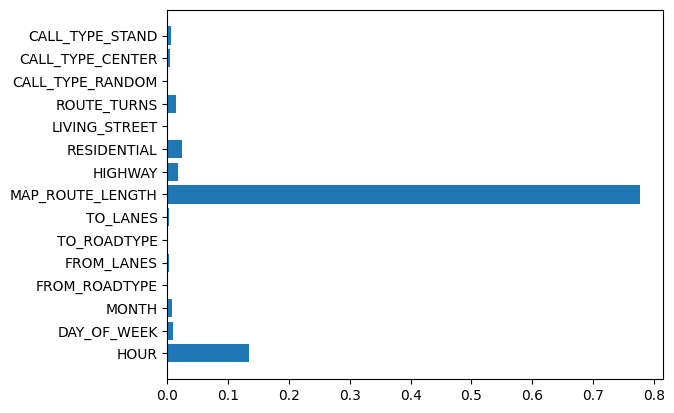

In [31]:
_ = plt.barh(df.drop('TRAVEL_DURATION',axis=1).columns, rfr.feature_importances_)

<font color='#425451'>Performance on Test</font>  

In [38]:
print('Mean rooted square error in minites: ')
math.sqrt(mean_squared_error(y_test,y_pred))/60

Mean rooted square error in minites: 


6.370874799279679

<br> <br>

##  <font color='#37665f'>Travel Value Classification | Classification Task</font> 

Taxi cost meter system depends on the time that the taxi is occupied and the distance of the trip. <br>
We are going to create a metric to annotate high value taxi trips. <br>
The scope is to create a high value class and create a classifier that predicts is a trip is high value or not based on the information of the starting point. <br>
This way, taxi divers will be able have a prediction of the trip and decide if they will take the trip or not. 

In [65]:
# normalize columns so they can be comparable when combined
df['TRAVEL_DURATION'] = (df['TRAVEL_DURATION'] - df['TRAVEL_DURATION'].min()) / (df['TRAVEL_DURATION'].max() - df['TRAVEL_DURATION'].min())    
df['MAP_ROUTE_LENGTH'] = (df['MAP_ROUTE_LENGTH'] - df['MAP_ROUTE_LENGTH'].min()) / (df['MAP_ROUTE_LENGTH'].max() - df['MAP_ROUTE_LENGTH'].min())    

df['VALUE_FACTOR'] = df['TRAVEL_DURATION']*df['MAP_ROUTE_LENGTH']

In [66]:
thres = df['VALUE_FACTOR'].quantile(0.75)
df['HIGH_VALUE'] = df['VALUE_FACTOR'].apply(lambda x: 1 if x>=thres else 0)

In [67]:
df['HIGH_VALUE'].value_counts()

0    51745
1    17249
Name: HIGH_VALUE, dtype: int64

In [68]:
df.drop(['TRAVEL_DURATION','VALUE_FACTOR'], axis=1, inplace=True)

####  <font color='#425451'>Train - Test Data Split</font> 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('HIGH_VALUE', axis=1), 
                                                    df['HIGH_VALUE'], 
                                                    test_size = 0.2, 
                                                    random_state=32)

In [70]:
X_train.shape

(55195, 15)

In [71]:
X_test.shape

(13799, 15)

####  <font color='#425451'>Scale Data</font> 

In [72]:
x_scaler = StandardScaler()

X_train_s = x_scaler.fit_transform(X_train)
X_test_s = x_scaler.transform(X_test)  

# save scaler to use when scoring new data
joblib.dump(x_scaler, './models/x_scaler_travel_value.pkl')

['./models/x_scaler_travel_value.pkl']

####  <font color='#425451'>Evaluation Function</font> 

In [73]:
def evalBinaryClassifier(model, x, y, labels=['Positives','Negatives'], thres=0.5):
    
    # evaluation on test set
    pred_test = (model.predict_proba(X_test)[:,1] >= thres)
    score_test = f1_score(y_test, pred_test,average='micro')
    print(classification_report(y_test, pred_test))
    
    # predict probabilities of positive class
    p = model.predict_proba(x)
    if len(model.classes_)!=2:
        raise ValueError('A binary class problem is required')
    if model.classes_[1] == 1:
        pos_p = p[:,1]
    elif model.classes_[0] == 1:
        pos_p = p[:,0]
    
    plt.figure(figsize=[15,4])
    
    #1 -- Confusion matrix
    cm = confusion_matrix(y,model.predict_proba(x)[:,1] >= thres)
    plt.subplot(131)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, 
                annot_kws={"size": 14}, fmt='g')
    cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
    for i,t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])
    plt.title('Confusion Matrix', size=15)
    plt.xlabel('Predicted Values', size=13)
    plt.ylabel('True Values', size=13)
      
    #2 -- Distributions of Predicted Probabilities of both classes
    df = pd.DataFrame({'probPos':pos_p, 'target': y})
    plt.subplot(132)
    plt.hist(df[df.target==1].probPos, density=True, bins=25,
             alpha=.5, color='green',  label=labels[0])
    plt.hist(df[df.target==0].probPos, density=True, bins=25,
             alpha=.5, color='red', label=labels[1])
    plt.axvline(thres, color='blue', linestyle='--', label='Boundary')
    plt.xlim([0,1])
    plt.title('Distributions of Predictions', size=15)
    plt.xlabel('Positive Probability (predicted)', size=13)
    plt.ylabel('Samples (normalized scale)', size=13)
    plt.legend(loc="upper right")
    
    #3 -- ROC curve with annotated decision point
    fp_rates, tp_rates, _ = roc_curve(y,p[:,1])
    roc_auc = auc(fp_rates, tp_rates)
    plt.subplot(133)
    plt.plot(fp_rates, tp_rates, color='green',
             lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], lw=1, linestyle='--', color='grey')
    #plot current decision point:
    tn, fp, fn, tp = [i for i in cm.ravel()]
    plt.plot(fp/(fp+tn), tp/(tp+fn), 'bo', markersize=8, label='Decision Point')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)
    plt.title('ROC Curve', size=15)
    plt.legend(loc="lower right")
    plt.subplots_adjust(wspace=.3)
    plt.show()

####  <font color='#425451'>AdaBoost Classifier</font> 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10379
           1       0.85      0.78      0.81      3420

    accuracy                           0.91     13799
   macro avg       0.89      0.87      0.88     13799
weighted avg       0.91      0.91      0.91     13799



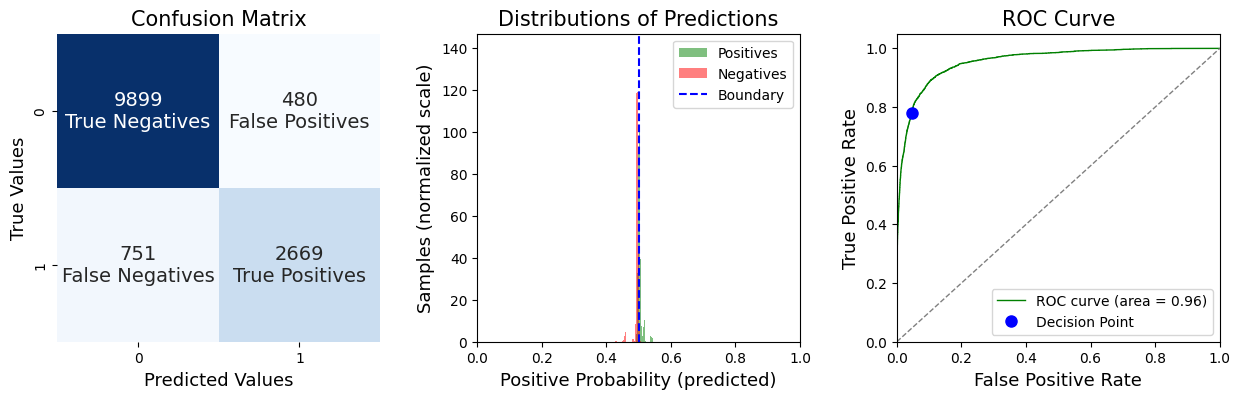

In [74]:
ada_clf = AdaBoostClassifier(n_estimators=200, random_state=42)

ada_clf.fit(X_train, y_train)

evalBinaryClassifier(ada_clf, X_test, y_test)

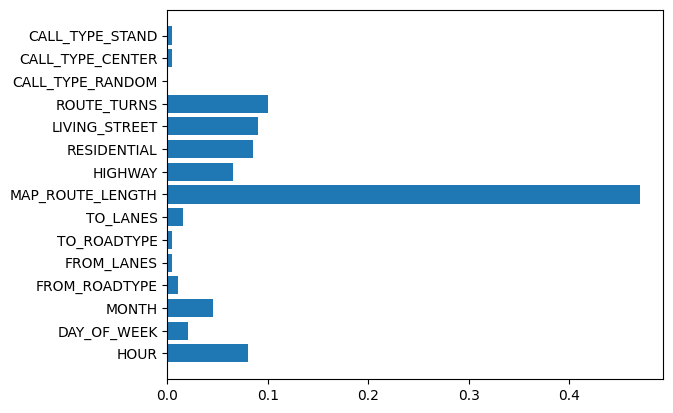

In [76]:
_ = plt.barh(df.drop('HIGH_VALUE',axis=1).columns, ada_clf.feature_importances_)

####  <font color='#425451'>Histogram-based Gradient Boosting Classifier</font> 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10379
           1       0.86      0.79      0.82      3420

    accuracy                           0.91     13799
   macro avg       0.89      0.87      0.88     13799
weighted avg       0.91      0.91      0.91     13799



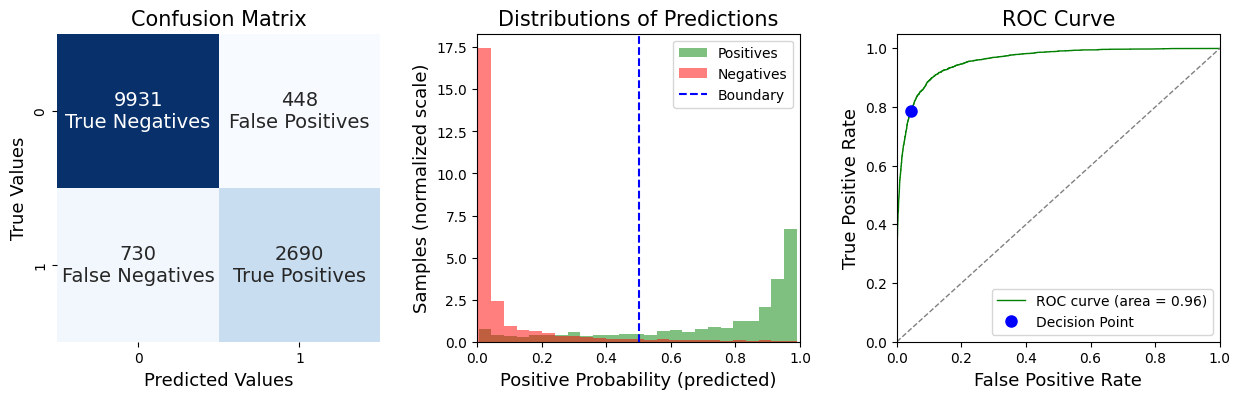

In [80]:
hgb = HistGradientBoostingClassifier(learning_rate=0.05, 
                                     max_depth=10,
                                     random_state=42)

hgb.fit(X_train, y_train)

evalBinaryClassifier(hgb, X_test, y_test)

<font color='#425451'>Evaluation with different decision point</font>  

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     10379
           1       0.77      0.87      0.82      3420

    accuracy                           0.90     13799
   macro avg       0.86      0.89      0.87     13799
weighted avg       0.91      0.90      0.90     13799



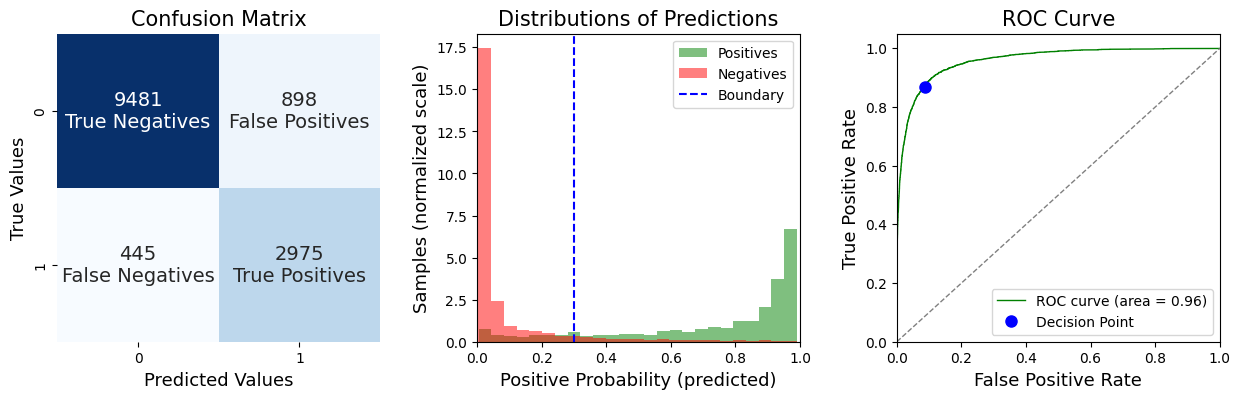

In [90]:
evalBinaryClassifier(hgb, X_test, y_test, thres=0.30)

####  <font color='#425451'>Voting Classifier</font> 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10379
           1       0.86      0.79      0.82      3420

    accuracy                           0.91     13799
   macro avg       0.89      0.87      0.88     13799
weighted avg       0.91      0.91      0.91     13799



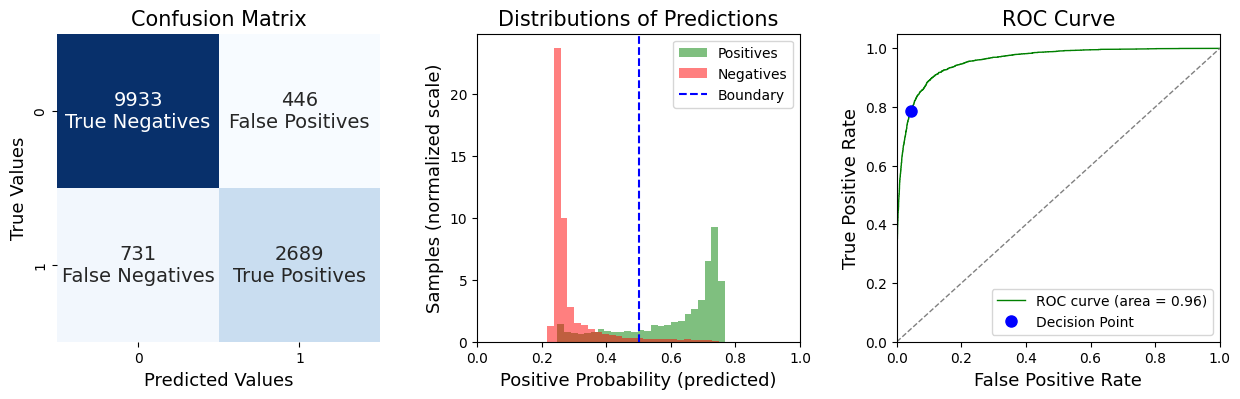

In [84]:
clf = VotingClassifier(estimators=[('ada_clf', ada_clf),('hgb', hgb)], voting='soft')
clf.fit(X_train, y_train)
evalBinaryClassifier(clf,X_test,y_test)